In [1]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import sklearn.preprocessing as sp
import seaborn as sns
%matplotlib inline

mp.rcParams['font.family'] = ['sans-serif']
mp.rcParams['font.sans-serif'] = ['SimHei']
mp.rcParams['axes.unicode_minus']=False

cc = pd.read_csv('CC GENERAL.csv',header='infer')
df_cc = pd.DataFrame(cc)
df_cc = df_cc.iloc[:,1:]
print(df_cc.shape)
df_cc.head(10)

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [2]:
df_cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [3]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [4]:
clo_list = list(df_cc.columns)
clo_list

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [5]:
for item in clo_list:
    print(item,':\n',df_cc[item].isnull().any())

BALANCE :
 False
BALANCE_FREQUENCY :
 False
PURCHASES :
 False
ONEOFF_PURCHASES :
 False
INSTALLMENTS_PURCHASES :
 False
CASH_ADVANCE :
 False
PURCHASES_FREQUENCY :
 False
ONEOFF_PURCHASES_FREQUENCY :
 False
PURCHASES_INSTALLMENTS_FREQUENCY :
 False
CASH_ADVANCE_FREQUENCY :
 False
CASH_ADVANCE_TRX :
 False
PURCHASES_TRX :
 False
CREDIT_LIMIT :
 True
PAYMENTS :
 False
MINIMUM_PAYMENTS :
 True
PRC_FULL_PAYMENT :
 False
TENURE :
 False


In [6]:
df_cc.isnull().sum().sort_values(ascending=False).head(2)

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
dtype: int64

In [7]:
df_cc.loc[df_cc['MINIMUM_PAYMENTS'].isnull()==True,'MINIMUM_PAYMENTS']=df_cc['MINIMUM_PAYMENTS'].mean()
df_cc.loc[df_cc['CREDIT_LIMIT'].isnull()==True,'CREDIT_LIMIT']=df_cc['CREDIT_LIMIT'].mean()
df_cc.isnull().sum().sort_values(ascending=False)

TENURE                              0
ONEOFF_PURCHASES_FREQUENCY          0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PRC_FULL_PAYMENT                    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
BALANCE                             0
dtype: int64

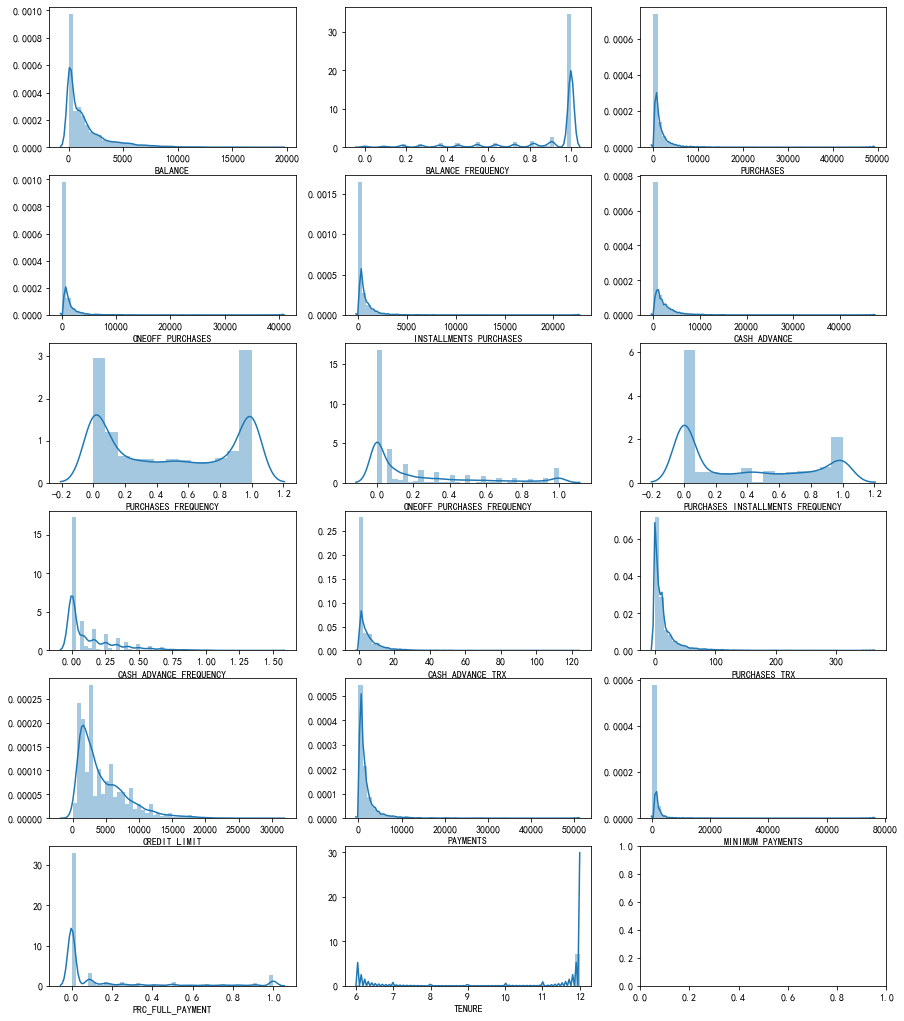

In [8]:
fig,axes = mp.subplots(nrows=6,ncols=3,figsize=(15,18))
r = 0
c = 0
for item in clo_list:
    if c<=2:
        sns.distplot(df_cc[item],ax=axes[r,c])
        c += 1
    else:
        r += 1
        c = 0
        sns.distplot(df_cc[item],ax=axes[r,c])
        c += 1

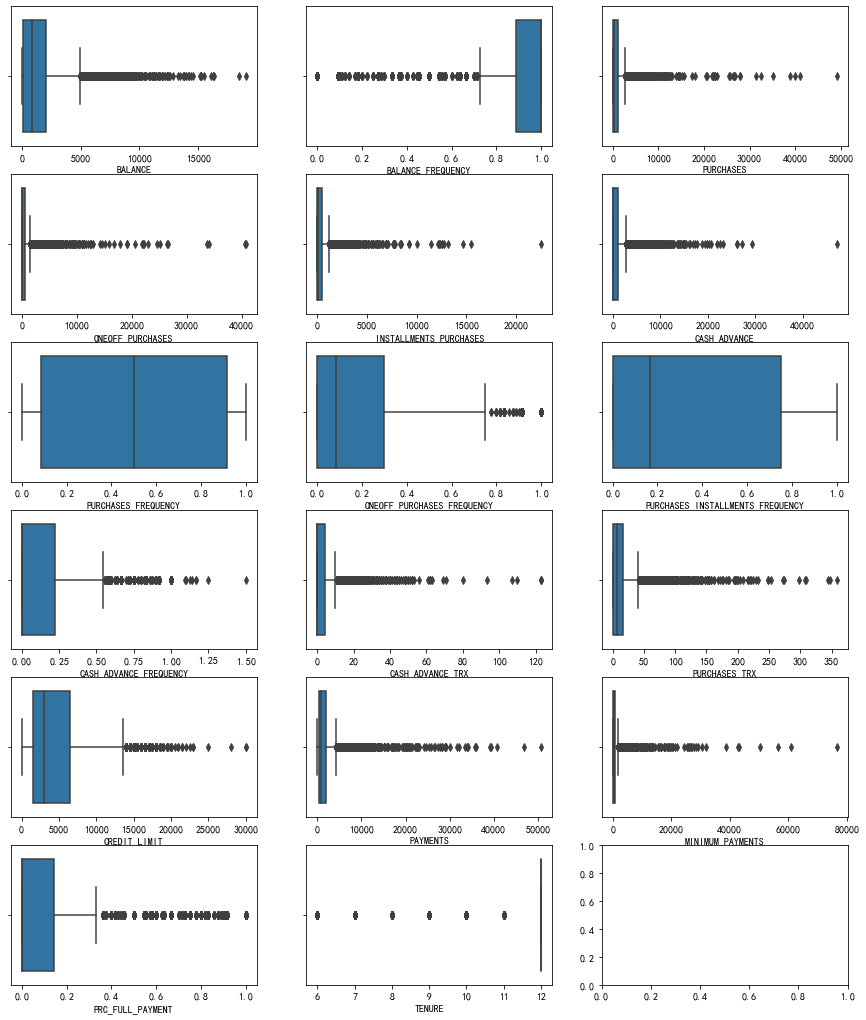

In [9]:
fig,axes = mp.subplots(nrows=6,ncols=3,figsize=(15,18))
r = 0
c = 0
for item in clo_list:
    if c<=2:
        sns.boxplot(x=item,data=df_cc,ax=axes[r,c])
        c += 1
    else:
        r += 1
        c = 0
        sns.boxplot(x=item,data=df_cc,ax=axes[r,c])
        c += 1

In [11]:
print('1% quantile:',df_cc['BALANCE'].quantile(q=0.25))
print('2% quantile:',df_cc['BALANCE'].quantile(q=0.5))
print('3% quantile:',df_cc['BALANCE'].quantile(q=0.75))
print('4% quantile:',df_cc['BALANCE'].quantile(q=1))
print('Above:',df_cc['BALANCE'].quantile(q=0.75)+df_cc['BALANCE'].quantile(q=0.75)*1.5-df_cc['BALANCE'].quantile(q=0.25),'are outliers')

1% quantile: 128.2819155
2% quantile: 873.385231
3% quantile: 2054.1400355
4% quantile: 19043.13856
Above: 5007.06817325 are outliers
